In [1]:
# EfficientNet-B0 com 4 Configurações por 40 epochs

In [5]:
#!pip install efficientnet-pytorch

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2
from tqdm import tqdm
import time
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet

Caminho do Notebook: /home/matildxi/projects_faa/project2/odir-project/notebooks
Raiz do Projeto: /home/matildxi/projects_faa/project2/odir-project
Caminho do Dataset: /home/matildxi/projects_faa/project2/odir-project/data/odir5k
✅ Sucesso: Pasta de dados encontrada!
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images


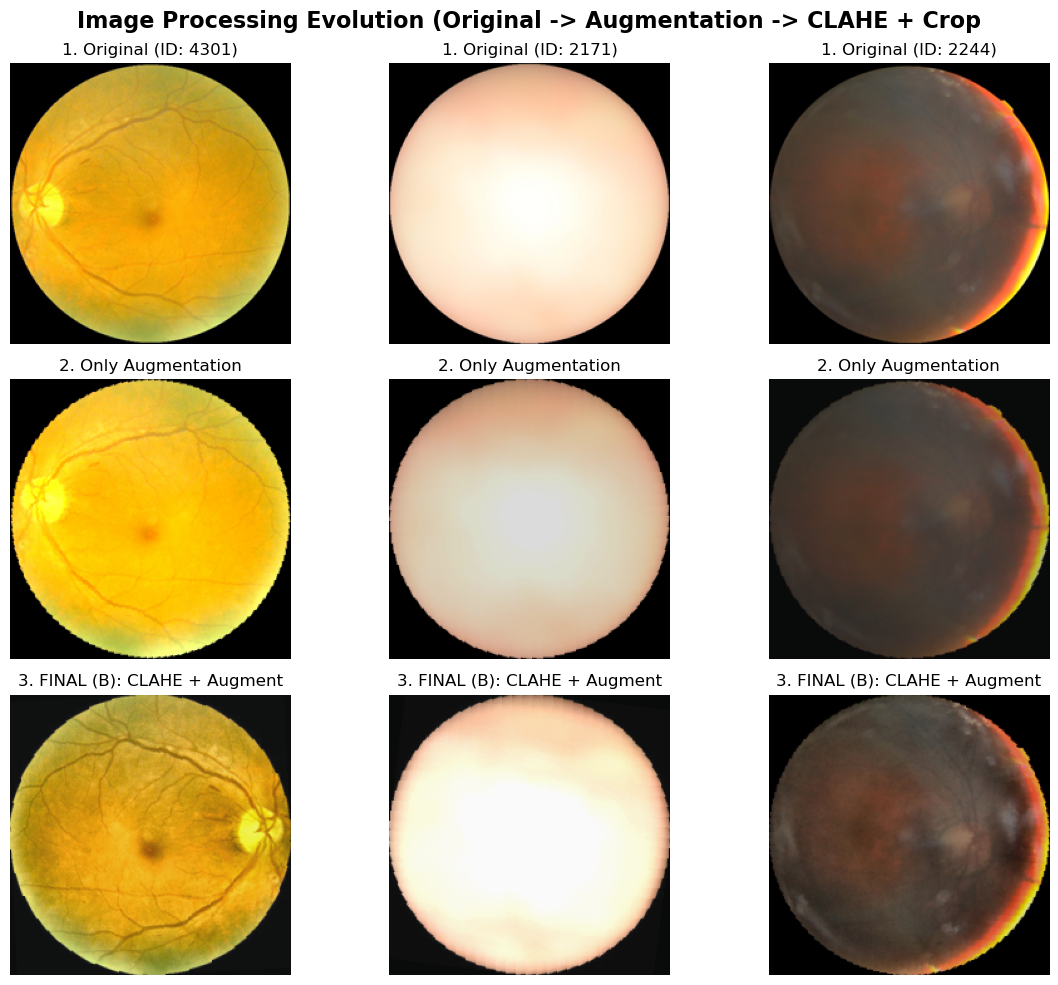

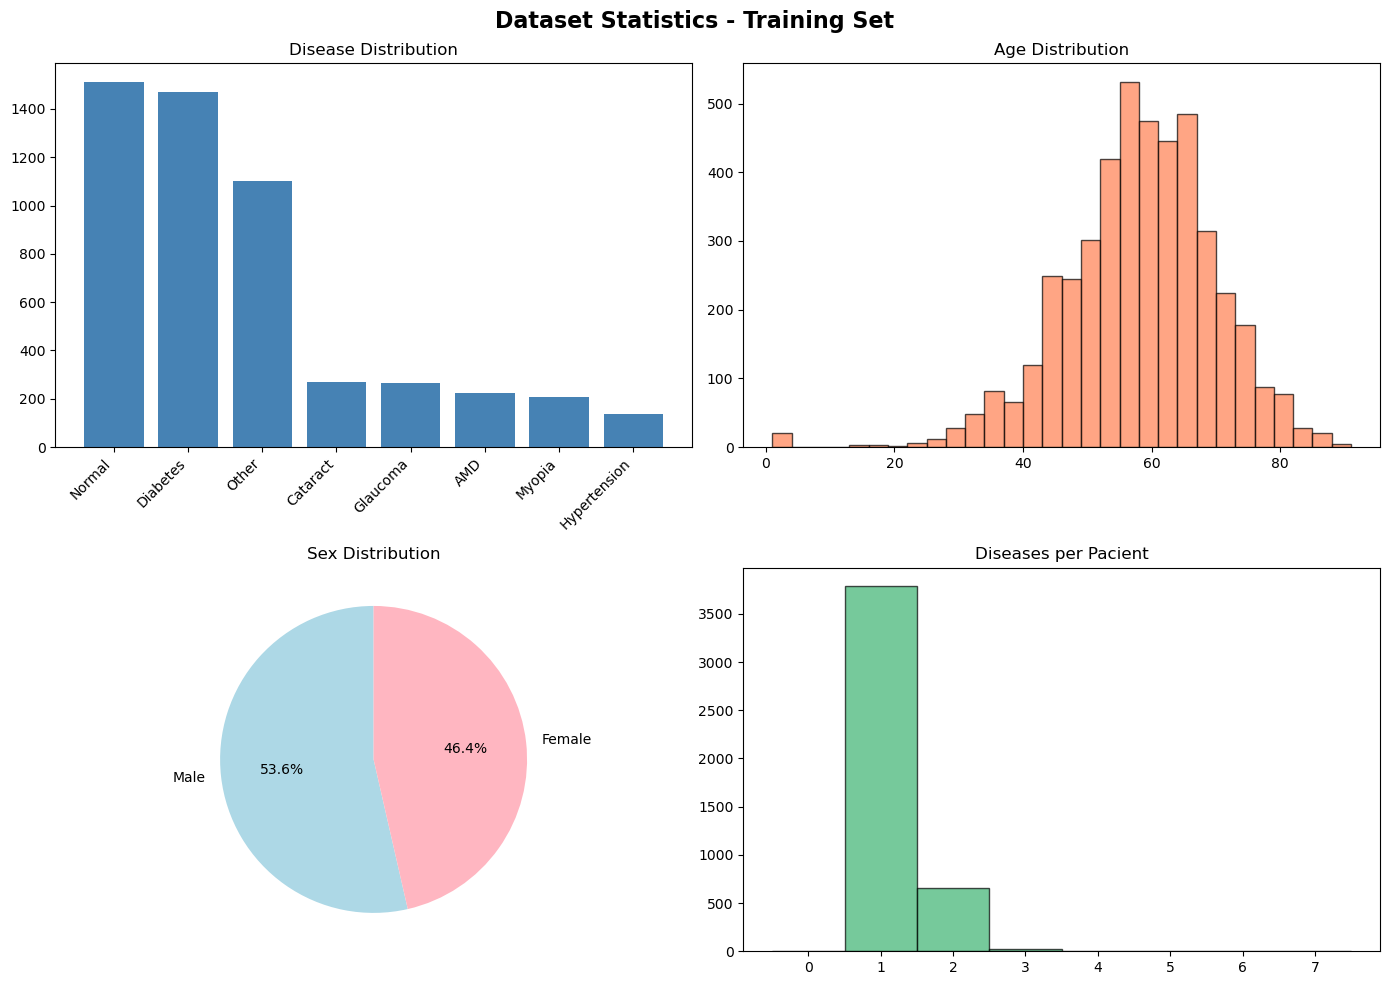

  Estatísticas guardadas em: results/dataset_statistics.png

 Resume: Train: 4474 | Val: 959 | Test: 959

COMPREHENSIVE EDA & PREPROCESSING ANALYSIS

DATASET SUMMARY - ODIR-5K
     Split  Patients  Images Percentage
  Training      2978    4474      70.0%
Validation       897     959      15.0%
      Test       891     959      15.0%
     Total      4766    6392       100%


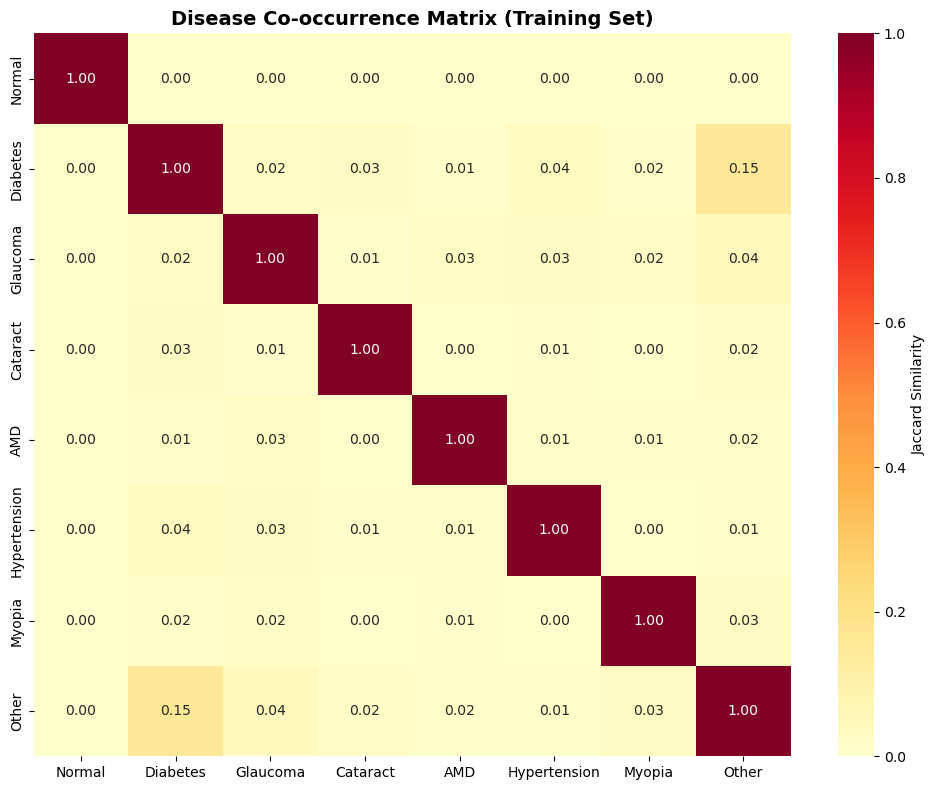


🔍 Most Common Disease Pairs:
  Diabetes + Other: 338 cases
  Diabetes + Hypertension: 59 cases
  Glaucoma + Other: 54 cases
  Diabetes + Cataract: 52 cases
  Diabetes + Glaucoma: 42 cases
  Myopia + Other: 36 cases
  Cataract + Other: 31 cases
  Diabetes + Myopia: 25 cases
  AMD + Other: 20 cases
  Diabetes + AMD: 19 cases

 Multi-label Statistics:
  Images with 0 diseases: 0 (0.0%)
  Images with 1 disease: 3791 (84.7%)
  Images with 2+ diseases: 683 (15.3%)
  Max diseases per image: 3
  Mean diseases per image: 1.16

📈 Per-Disease Statistics:
  Normal         : 1513 ( 33.8%)
  Diabetes       : 1470 ( 32.9%)
  Glaucoma       :  264 (  5.9%)
  Cataract       :  271 (  6.1%)
  AMD            :  223 (  5.0%)
  Hypertension   :  136 (  3.0%)
  Myopia         :  207 (  4.6%)
  Other          : 1100 ( 24.6%)
  📂 train: 4474 pacients, 5732 images

 Analyzing image quality (500 samples)...


100%|██████████| 500/500 [00:02<00:00, 213.44it/s]


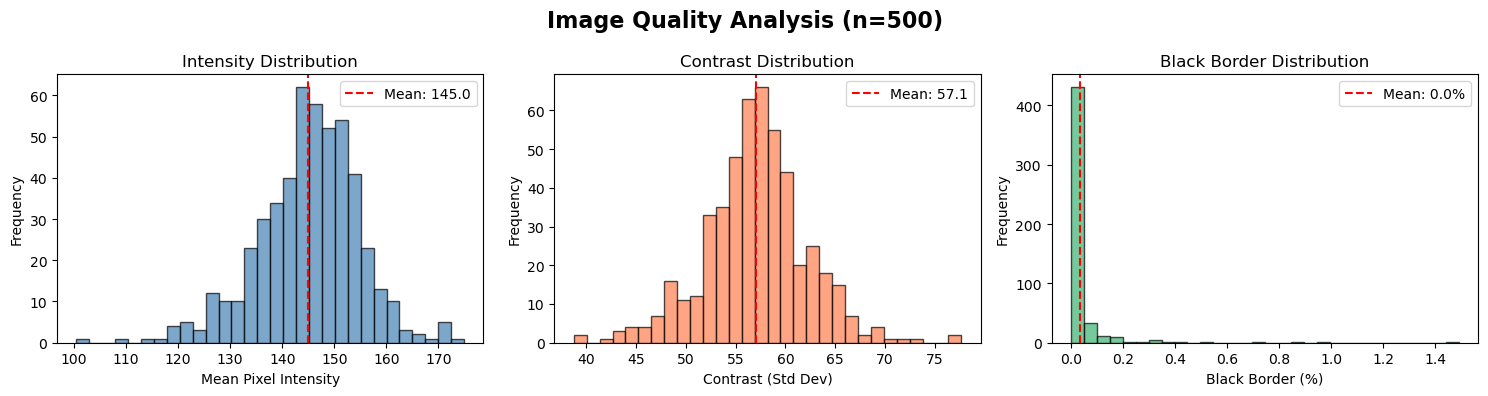


 Quality Metrics:
  Mean intensity: 145.0 ± 9.8
  Mean contrast: 57.1 ± 5.2
  Mean black border: 0.0% ± 0.1%
  Images with >10% black border: 0 (0.0%)

 Measuring Cropping Effect...


100%|██████████| 100/100 [00:00<00:00, 294.62it/s]


  Successfully analyzed: 100/100 images
  Mean pixels removed: 1.7% ± 1.5%
  Median: 1.8%
  Range: 0.0% - 11.7%
  Images with >20% removed: 0/100

 Measuring CLAHE Effect...
Loading datasets...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
Analyzing 50 images...


100%|██████████| 50/50 [00:00<00:00, 50.06it/s]


Successfully analyzed: 50/50 images


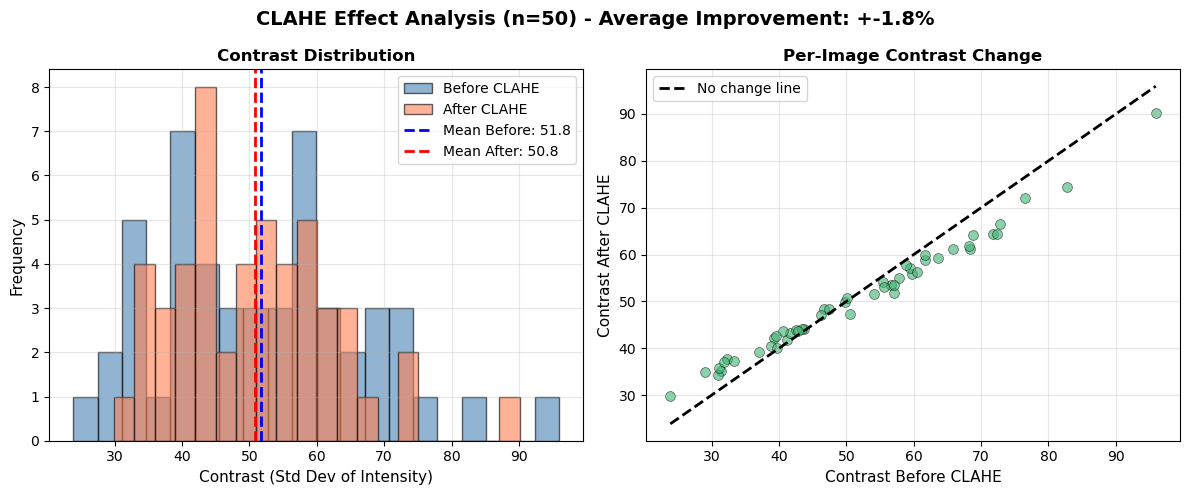


📊 Results:
  Mean contrast before: 51.76 ± 15.36
  Mean contrast after:  50.82 ± 11.82
  Average improvement:  +-1.8%
  Min improvement:      +-42.2%
  Max improvement:      +74.1%

 Metrics saved to results/clahe_metrics.json
 Figure saved to results/clahe_effect.png
  📂 train: 4474 pacients, 5732 images

 Generating pipeline visualization (3 samples)...
  📂 train: 4474 pacients, 5732 images
  📂 train: 4474 pacients, 5732 images
 Pipeline visualization saved to results/pipeline_simple.png


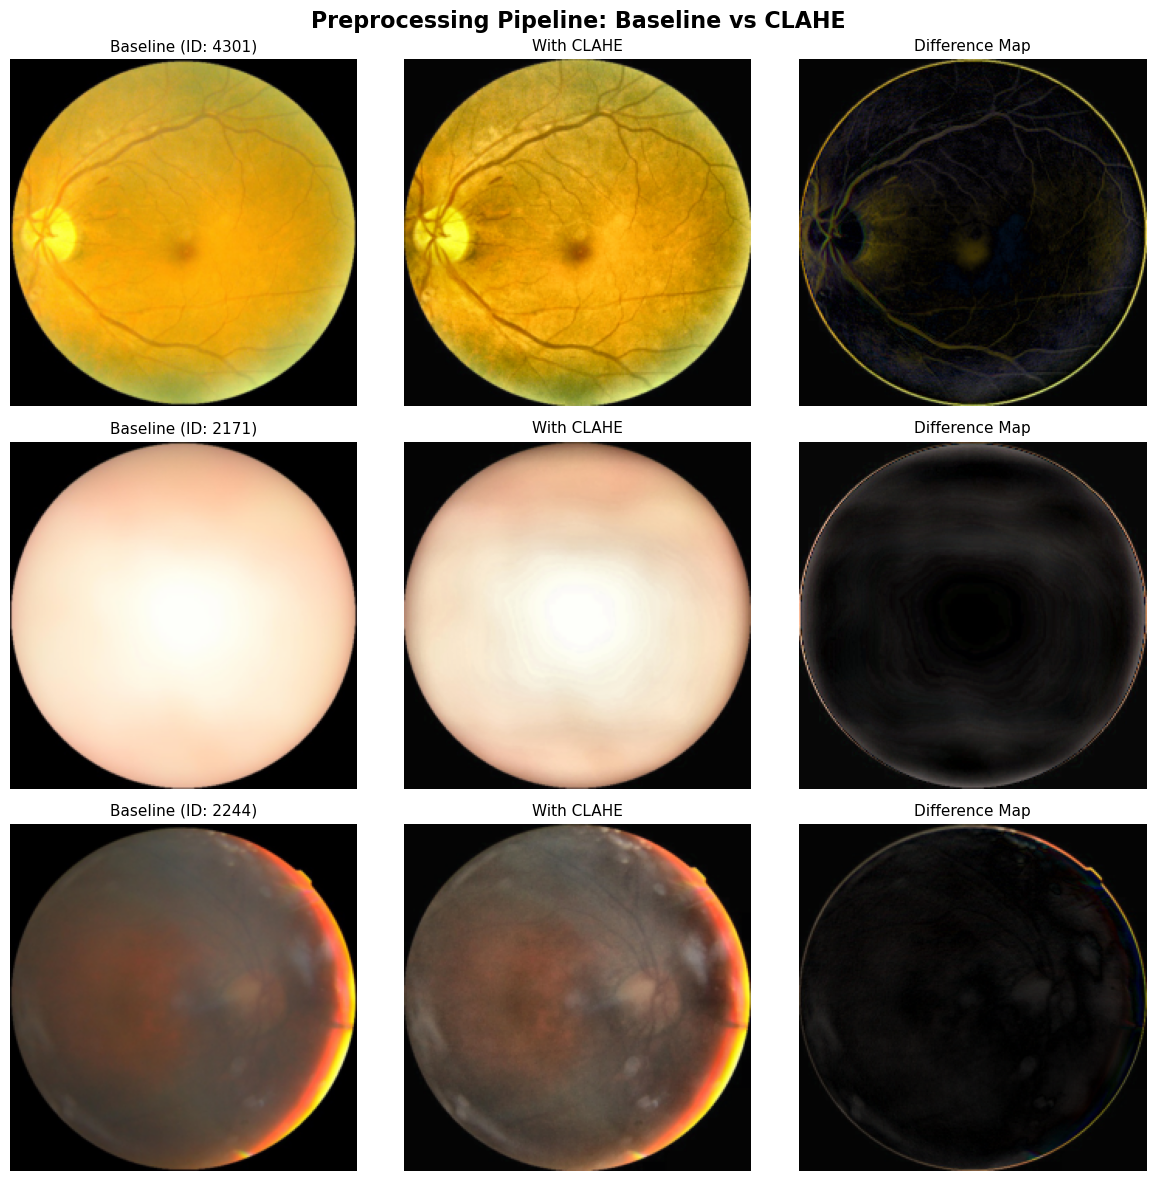


 All EDA and Preprocessing analyses completed!
   Check 'results/' folder for saved figures.
✅ ODIRDataset: OK
✅ ApplyCLAHEandCrop: OK
✅ CropOnly: OK

VERIFICAÇÃO - Tudo pronto para usar noutros notebooks
✅ ODIRDataset
✅ ApplyCLAHEandCrop
✅ CropOnly
✅ get_v1_baseline_transform
✅ get_v2_crop_only_transform
✅ get_v3_crop_aug_transform
✅ get_v4_full_pipeline_transform
✅ get_val_test_transform
✅ get_val_test_transform_CLAHE
✅ create_datasets_for_config

🎉 TUDO PRONTO! Podes usar %run neste notebook.

 Preprocessing carregado!


In [6]:
%run 01_Data_Preparation.ipynb

print("\n Preprocessing carregado!")

In [7]:
datasets_v1 = create_datasets_for_config('v1')
datasets_v2 = create_datasets_for_config('v2')
datasets_v3 = create_datasets_for_config('v3')
datasets_v4 = create_datasets_for_config('v4')


📦 Criando datasets para config: V1
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v1 criados!

📦 Criando datasets para config: V2
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v2 criados!

📦 Criando datasets para config: V3
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v3 criados!

📦 Criando datasets para config: V4
  📂 train: 4474 pacients, 5732 images
  📂 val: 959 pacients, 1728 images
  📂 test: 959 pacients, 1748 images
✅ Datasets v4 criados!


In [11]:
train_v1 = datasets_v1['train']
val_v1 = datasets_v1['val']
test_v1 = datasets_v1['test']

train_v2 = datasets_v2['train']
val_v2 = datasets_v2['val']
test_v2 = datasets_v2['test']

train_v3 = datasets_v3['train']
val_v3 = datasets_v3['val']
test_v3 = datasets_v3['test']

train_v4 = datasets_v4['train']
val_v4 = datasets_v4['val']
test_v4 = datasets_v4['test']

In [12]:
class EfficientNetB0MultiLabel(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        
        # pre-trained
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b0')
        
        # change last lyer to 8 classes
        in_features = self.efficientnet._fc.in_features
        self.efficientnet._fc = nn.Linear(in_features, num_classes)
    
    def forward(self, x):
        return self.efficientnet(x)

# Test
model_test = EfficientNetB0MultiLabel(num_classes=8)
print(f"Params: {sum(p.numel() for p in model_test.parameters()):,}")

Loaded pretrained weights for efficientnet-b0
Params: 4,017,796


In [13]:
def train_model(train_dataset, val_dataset, test_dataset, 
                config_name, num_epochs=30):
    
    print(f"\n{'='*60}")
    print(f"TREINO: {config_name}")
    print(f"{'='*60}\n")
    
    # DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
    
    # Modelo
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EfficientNetB0MultiLabel(num_classes=8).to(device)
    
    # Loss e optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
    
    best_val_f1 = 0.0
    
    # TREINO
    for epoch in range(num_epochs):
        # TRAIN
        model.train()
        train_loss = 0
        
        for images, labels, _ in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        
        # VALIDAÇÃO
        model.eval()
        val_preds, val_labels = [], []
        
        with torch.no_grad():
            for images, labels, _ in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                
                val_preds.append(torch.sigmoid(outputs).cpu())
                val_labels.append(labels.cpu())
        
        val_preds = torch.cat(val_preds).numpy()
        val_labels = torch.cat(val_labels).numpy()
        val_f1 = f1_score(val_labels, (val_preds > 0.5).astype(int), average='macro')
        
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val F1={val_f1:.4f}")
        
        # Guardar melhor modelo
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            torch.save(model.state_dict(), f'efficientnet_{config_name}_best.pth')
    
    # TESTE
    print("\nA testar no test set...")
    model.load_state_dict(torch.load(f'efficientnet_{config_name}_best.pth'))
    model.eval()
    
    test_preds, test_labels = [], []
    with torch.no_grad():
        for images, labels, _ in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_preds.append(torch.sigmoid(outputs).cpu())
            test_labels.append(labels.cpu())
    
    test_preds = torch.cat(test_preds).numpy()
    test_labels = torch.cat(test_labels).numpy()
    
    test_f1 = f1_score(test_labels, (test_preds > 0.5).astype(int), average='macro')
    test_acc = accuracy_score(test_labels, (test_preds > 0.5).astype(int))
    
    print(f"\n📊 RESULTADOS FINAIS - {config_name}:")
    print(f"  Test F1: {test_f1:.4f}")
    print(f"  Test Acc: {test_acc:.4f}")
    
    return test_f1, test_acc

In [ ]:
# Treinar V1
f1_v1, acc_v1 = train_model(train_v1, val_v1, test_v1, 'v1', num_epochs=40)
# Treinar V2
f1_v2, acc_v2 = train_model(train_v2, val_v2, test_v2, 'v2', num_epochs=40)
# Treinar V3
f1_v3, acc_v3 = train_model(train_v3, val_v3, test_v3, 'v3', num_epochs=40)
# Treinar V4
f1_v4, acc_v4 = train_model(train_v4, val_v4, test_v4, 'v4', num_epochs=40)


TREINO: v1

Loaded pretrained weights for efficientnet-b0


Epoch 1/40: 100%|██████████| 140/140 [05:31<00:00,  2.37s/it]


Epoch 1: Train Loss=0.3181, Val F1=0.3241


Epoch 2/40:  23%|██▎       | 32/140 [01:29<04:21,  2.42s/it]